# Getting Started

you need to install hftbacktest first.

In [1]:
#!pip install hftbacktest

### Loading data

In [2]:
import pandas as pd

# Read gzipped-pickled DataFrame
# Sample data is Binance Futures BNBUSDT
df = pd.read_pickle("../usdm/bnbusdt_20221117.pkl", compression='gzip')

# Market depth feed of the data is changes of the quantity of a price.
# So you need the initial snapshot of the market depth in order to build the market depth correctly.
# bnbusdt_20221116.snapshot.pkl is the End-Of-Day(UTC 00:00) market depth snapshot so it's the initial snapshot of 20221117.
snapshot_df = pd.read_pickle("../usdm/bnbusdt_20221116.snapshot.pkl", compression='gzip')

### Correcting timestamps, we will look into this later again.

In [3]:
from hftbacktest import correct

df = correct(df, 5_000)

local_timestamp is ahead of exch_timestamp by 1165.0
found 12781 rows that exch_timestamp is ahead of the previous exch_timestamp
Correction is done.


### Printing the best bid and the best ask

In [4]:
from numba import njit

# numba.njit is strongly recommended for fast backtesting.
@njit
def print_bbo(hbt):
    # Iterating until hftbacktest reaches the end of data.
    while hbt.run:
        # Move local_timestamp for a given time. time unit is the same as data's timestamp's unit.
        # timestamp of the sample data is in microseconds.
        # Elapse 60-sec every iteration.
        if not hbt.elapse(60 * 1e6):
            # hftbacktest encounters the end of data while elapsing.
            return False
        
        # Print the best bid and the best offer.
        print('local_timestamp:', hbt.local_timestamp,
              ', best_bid:', round(hbt.best_bid, 3),
              ', best_ask:', round(hbt.best_ask, 3))
    return True

In [5]:
from hftbacktest import HftBacktest, FeedLatency, Linear

hbt = HftBacktest(df,
                  tick_size=0.01,   # Tick size of a target trading asset
                  lot_size=0.01,    # Lot size of a target trading asset, minimum trading unit.
                  maker_fee=0.0002, # 0.02%, Maker fee, rebates if it is negative.
                  taker_fee=0.0007, # 0.07%, Taker fee. 
                  order_latency=FeedLatency(), # Latency model: ConstantLatency, FeedLatency.
                  asset_type=Linear, # Asset type: Linear, Inverse.
                  snapshot=snapshot_df) 

You can see the best bid and the best ask every 60-sec.

In [6]:
print_bbo(hbt)

local_timestamp: 1668643260012400 , best_bid: 272.18 , best_ask: 272.19
local_timestamp: 1668643320012400 , best_bid: 271.97 , best_ask: 271.98
local_timestamp: 1668643380012400 , best_bid: 272.32 , best_ask: 272.33
local_timestamp: 1668643440012400 , best_bid: 272.46 , best_ask: 272.47
local_timestamp: 1668643500012400 , best_bid: 272.27 , best_ask: 272.29
local_timestamp: 1668643560012400 , best_bid: 272.1 , best_ask: 272.11
local_timestamp: 1668643620012400 , best_bid: 272.29 , best_ask: 272.3
local_timestamp: 1668643680012400 , best_bid: 272.14 , best_ask: 272.15
local_timestamp: 1668643740012400 , best_bid: 272.3 , best_ask: 272.31
local_timestamp: 1668643800012400 , best_bid: 272.52 , best_ask: 272.53
local_timestamp: 1668643860012400 , best_bid: 272.36 , best_ask: 272.37
local_timestamp: 1668643920012400 , best_bid: 272.58 , best_ask: 272.59
local_timestamp: 1668643980012400 , best_bid: 272.51 , best_ask: 272.52
local_timestamp: 1668644040012400 , best_bid: 272.44 , best_ask: 27

local_timestamp: 1668650880012400 , best_bid: 272.57 , best_ask: 272.58
local_timestamp: 1668650940012400 , best_bid: 272.58 , best_ask: 272.59
local_timestamp: 1668651000012400 , best_bid: 272.54 , best_ask: 272.55
local_timestamp: 1668651060012400 , best_bid: 272.63 , best_ask: 272.64
local_timestamp: 1668651120012400 , best_bid: 272.63 , best_ask: 272.64
local_timestamp: 1668651180012400 , best_bid: 272.42 , best_ask: 272.43
local_timestamp: 1668651240012400 , best_bid: 272.43 , best_ask: 272.44
local_timestamp: 1668651300012400 , best_bid: 272.45 , best_ask: 272.46
local_timestamp: 1668651360012400 , best_bid: 272.31 , best_ask: 272.32
local_timestamp: 1668651420012400 , best_bid: 272.34 , best_ask: 272.35
local_timestamp: 1668651480012400 , best_bid: 272.25 , best_ask: 272.26
local_timestamp: 1668651540012400 , best_bid: 272.25 , best_ask: 272.26
local_timestamp: 1668651600012400 , best_bid: 272.26 , best_ask: 272.27
local_timestamp: 1668651660012400 , best_bid: 272.23 , best_ask:

local_timestamp: 1668657960012400 , best_bid: 265.67 , best_ask: 265.69
local_timestamp: 1668658020012400 , best_bid: 266.14 , best_ask: 266.15
local_timestamp: 1668658080012400 , best_bid: 266.31 , best_ask: 266.33
local_timestamp: 1668658140012400 , best_bid: 266.43 , best_ask: 266.45
local_timestamp: 1668658200012400 , best_bid: 266.6 , best_ask: 266.61
local_timestamp: 1668658260012400 , best_bid: 266.82 , best_ask: 266.83
local_timestamp: 1668658320012400 , best_bid: 266.71 , best_ask: 266.72
local_timestamp: 1668658380012400 , best_bid: 266.69 , best_ask: 266.7
local_timestamp: 1668658440012400 , best_bid: 266.73 , best_ask: 266.74
local_timestamp: 1668658500012400 , best_bid: 266.65 , best_ask: 266.66
local_timestamp: 1668658560012400 , best_bid: 267.04 , best_ask: 267.05
local_timestamp: 1668658620012400 , best_bid: 267.33 , best_ask: 267.34
local_timestamp: 1668658680012400 , best_bid: 267.42 , best_ask: 267.43
local_timestamp: 1668658740012400 , best_bid: 267.79 , best_ask: 2

local_timestamp: 1668665700012400 , best_bid: 270.56 , best_ask: 270.57
local_timestamp: 1668665760012400 , best_bid: 270.39 , best_ask: 270.4
local_timestamp: 1668665820012400 , best_bid: 270.34 , best_ask: 270.35
local_timestamp: 1668665880012400 , best_bid: 270.51 , best_ask: 270.52
local_timestamp: 1668665940012400 , best_bid: 270.67 , best_ask: 270.68
local_timestamp: 1668666000012400 , best_bid: 270.63 , best_ask: 270.64
local_timestamp: 1668666060012400 , best_bid: 270.82 , best_ask: 270.83
local_timestamp: 1668666120012400 , best_bid: 270.84 , best_ask: 270.85
local_timestamp: 1668666180012400 , best_bid: 270.85 , best_ask: 270.86
local_timestamp: 1668666240012400 , best_bid: 270.95 , best_ask: 270.96
local_timestamp: 1668666300012400 , best_bid: 270.98 , best_ask: 270.99
local_timestamp: 1668666360012400 , best_bid: 271.06 , best_ask: 271.07
local_timestamp: 1668666420012400 , best_bid: 270.97 , best_ask: 270.98
local_timestamp: 1668666480012400 , best_bid: 270.84 , best_ask: 

local_timestamp: 1668673260012400 , best_bid: 268.99 , best_ask: 269.0
local_timestamp: 1668673320012400 , best_bid: 268.92 , best_ask: 268.93
local_timestamp: 1668673380012400 , best_bid: 268.83 , best_ask: 268.84
local_timestamp: 1668673440012400 , best_bid: 268.64 , best_ask: 268.65
local_timestamp: 1668673500012400 , best_bid: 268.57 , best_ask: 268.58
local_timestamp: 1668673560012400 , best_bid: 268.95 , best_ask: 268.96
local_timestamp: 1668673620012400 , best_bid: 268.67 , best_ask: 268.68
local_timestamp: 1668673680012400 , best_bid: 268.74 , best_ask: 268.75
local_timestamp: 1668673740012400 , best_bid: 268.6 , best_ask: 268.61
local_timestamp: 1668673800012400 , best_bid: 268.18 , best_ask: 268.19
local_timestamp: 1668673860012400 , best_bid: 268.75 , best_ask: 268.76
local_timestamp: 1668673920012400 , best_bid: 268.62 , best_ask: 268.63
local_timestamp: 1668673980012400 , best_bid: 268.96 , best_ask: 268.97
local_timestamp: 1668674040012400 , best_bid: 268.86 , best_ask: 2

local_timestamp: 1668681540012400 , best_bid: 266.06 , best_ask: 266.07
local_timestamp: 1668681600012400 , best_bid: 266.02 , best_ask: 266.03
local_timestamp: 1668681660012400 , best_bid: 266.14 , best_ask: 266.15
local_timestamp: 1668681720012400 , best_bid: 266.29 , best_ask: 266.3
local_timestamp: 1668681780012400 , best_bid: 266.35 , best_ask: 266.36
local_timestamp: 1668681840012400 , best_bid: 266.48 , best_ask: 266.49
local_timestamp: 1668681900012400 , best_bid: 266.49 , best_ask: 266.5
local_timestamp: 1668681960012400 , best_bid: 266.5 , best_ask: 266.51
local_timestamp: 1668682020012400 , best_bid: 266.42 , best_ask: 266.43
local_timestamp: 1668682080012400 , best_bid: 266.49 , best_ask: 266.5
local_timestamp: 1668682140012400 , best_bid: 266.46 , best_ask: 266.47
local_timestamp: 1668682200012400 , best_bid: 266.68 , best_ask: 266.69
local_timestamp: 1668682260012400 , best_bid: 266.44 , best_ask: 266.45
local_timestamp: 1668682320012400 , best_bid: 266.07 , best_ask: 266

local_timestamp: 1668690180012400 , best_bid: 267.05 , best_ask: 267.06
local_timestamp: 1668690240012400 , best_bid: 266.75 , best_ask: 266.76
local_timestamp: 1668690300012400 , best_bid: 266.53 , best_ask: 266.54
local_timestamp: 1668690360012400 , best_bid: 266.25 , best_ask: 266.26
local_timestamp: 1668690420012400 , best_bid: 266.29 , best_ask: 266.3
local_timestamp: 1668690480012400 , best_bid: 266.54 , best_ask: 266.55
local_timestamp: 1668690540012400 , best_bid: 266.2 , best_ask: 266.21
local_timestamp: 1668690600012400 , best_bid: 266.34 , best_ask: 266.35
local_timestamp: 1668690660012400 , best_bid: 266.06 , best_ask: 266.07
local_timestamp: 1668690720012400 , best_bid: 265.92 , best_ask: 265.93
local_timestamp: 1668690780012400 , best_bid: 265.7 , best_ask: 265.71
local_timestamp: 1668690840012400 , best_bid: 265.99 , best_ask: 266.0
local_timestamp: 1668690900012400 , best_bid: 266.02 , best_ask: 266.03
local_timestamp: 1668690960012400 , best_bid: 266.08 , best_ask: 266

local_timestamp: 1668697740012400 , best_bid: 267.04 , best_ask: 267.05
local_timestamp: 1668697800012400 , best_bid: 266.75 , best_ask: 266.76
local_timestamp: 1668697860012400 , best_bid: 267.31 , best_ask: 267.32
local_timestamp: 1668697920012400 , best_bid: 266.83 , best_ask: 266.84
local_timestamp: 1668697980012400 , best_bid: 266.72 , best_ask: 266.73
local_timestamp: 1668698040012400 , best_bid: 267.04 , best_ask: 267.05
local_timestamp: 1668698100012400 , best_bid: 267.18 , best_ask: 267.19
local_timestamp: 1668698160012400 , best_bid: 267.26 , best_ask: 267.27
local_timestamp: 1668698220012400 , best_bid: 267.58 , best_ask: 267.59
local_timestamp: 1668698280012400 , best_bid: 268.48 , best_ask: 268.49
local_timestamp: 1668698340012400 , best_bid: 268.47 , best_ask: 268.48
local_timestamp: 1668698400012400 , best_bid: 268.43 , best_ask: 268.44
local_timestamp: 1668698460012400 , best_bid: 268.8 , best_ask: 268.81
local_timestamp: 1668698520012400 , best_bid: 268.8 , best_ask: 2

local_timestamp: 1668706080012400 , best_bid: 268.3 , best_ask: 268.31
local_timestamp: 1668706140012400 , best_bid: 268.32 , best_ask: 268.33
local_timestamp: 1668706200012400 , best_bid: 268.26 , best_ask: 268.27
local_timestamp: 1668706260012400 , best_bid: 268.22 , best_ask: 268.23
local_timestamp: 1668706320012400 , best_bid: 268.22 , best_ask: 268.23
local_timestamp: 1668706380012400 , best_bid: 268.18 , best_ask: 268.19
local_timestamp: 1668706440012400 , best_bid: 268.1 , best_ask: 268.11
local_timestamp: 1668706500012400 , best_bid: 267.83 , best_ask: 267.84
local_timestamp: 1668706560012400 , best_bid: 267.93 , best_ask: 267.94
local_timestamp: 1668706620012400 , best_bid: 268.06 , best_ask: 268.07
local_timestamp: 1668706680012400 , best_bid: 267.85 , best_ask: 267.86
local_timestamp: 1668706740012400 , best_bid: 267.88 , best_ask: 267.89
local_timestamp: 1668706800012400 , best_bid: 267.66 , best_ask: 267.67
local_timestamp: 1668706860012400 , best_bid: 267.61 , best_ask: 2

local_timestamp: 1668713220012400 , best_bid: 267.91 , best_ask: 267.92
local_timestamp: 1668713280012400 , best_bid: 267.91 , best_ask: 267.92
local_timestamp: 1668713340012400 , best_bid: 267.92 , best_ask: 267.93
local_timestamp: 1668713400012400 , best_bid: 267.95 , best_ask: 267.96
local_timestamp: 1668713460012400 , best_bid: 267.98 , best_ask: 267.99
local_timestamp: 1668713520012400 , best_bid: 267.92 , best_ask: 267.93
local_timestamp: 1668713580012400 , best_bid: 267.86 , best_ask: 267.87
local_timestamp: 1668713640012400 , best_bid: 267.89 , best_ask: 267.9
local_timestamp: 1668713700012400 , best_bid: 267.95 , best_ask: 267.96
local_timestamp: 1668713760012400 , best_bid: 267.79 , best_ask: 267.8
local_timestamp: 1668713820012400 , best_bid: 267.76 , best_ask: 267.77
local_timestamp: 1668713880012400 , best_bid: 267.91 , best_ask: 267.92
local_timestamp: 1668713940012400 , best_bid: 267.85 , best_ask: 267.86
local_timestamp: 1668714000012400 , best_bid: 267.83 , best_ask: 2

local_timestamp: 1668720180012400 , best_bid: 267.95 , best_ask: 267.96
local_timestamp: 1668720240012400 , best_bid: 267.94 , best_ask: 267.95
local_timestamp: 1668720300012400 , best_bid: 267.84 , best_ask: 267.85
local_timestamp: 1668720360012400 , best_bid: 267.64 , best_ask: 267.65
local_timestamp: 1668720420012400 , best_bid: 267.5 , best_ask: 267.51
local_timestamp: 1668720480012400 , best_bid: 267.64 , best_ask: 267.65
local_timestamp: 1668720540012400 , best_bid: 267.52 , best_ask: 267.53
local_timestamp: 1668720600012400 , best_bid: 267.39 , best_ask: 267.4
local_timestamp: 1668720660012400 , best_bid: 267.47 , best_ask: 267.48
local_timestamp: 1668720720012400 , best_bid: 267.44 , best_ask: 267.45
local_timestamp: 1668720780012400 , best_bid: 267.37 , best_ask: 267.38
local_timestamp: 1668720840012400 , best_bid: 267.38 , best_ask: 267.39
local_timestamp: 1668720900012400 , best_bid: 267.47 , best_ask: 267.48
local_timestamp: 1668720960012400 , best_bid: 267.58 , best_ask: 2

local_timestamp: 1668727260012400 , best_bid: 267.4 , best_ask: 267.41
local_timestamp: 1668727320012400 , best_bid: 267.51 , best_ask: 267.52
local_timestamp: 1668727380012400 , best_bid: 267.46 , best_ask: 267.47
local_timestamp: 1668727440012400 , best_bid: 267.47 , best_ask: 267.48
local_timestamp: 1668727500012400 , best_bid: 267.33 , best_ask: 267.34
local_timestamp: 1668727560012400 , best_bid: 267.48 , best_ask: 267.49
local_timestamp: 1668727620012400 , best_bid: 267.49 , best_ask: 267.5
local_timestamp: 1668727680012400 , best_bid: 267.54 , best_ask: 267.55
local_timestamp: 1668727740012400 , best_bid: 267.55 , best_ask: 267.56
local_timestamp: 1668727800012400 , best_bid: 267.75 , best_ask: 267.76
local_timestamp: 1668727860012400 , best_bid: 267.35 , best_ask: 267.36
local_timestamp: 1668727920012400 , best_bid: 267.55 , best_ask: 267.56
local_timestamp: 1668727980012400 , best_bid: 267.58 , best_ask: 267.59
local_timestamp: 1668728040012400 , best_bid: 267.38 , best_ask: 2

False

### Getting market depth

In [7]:
@njit
def print_3depth(hbt):
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        # a key of bid_depth or ask_depth is price in tick format.
        # (integer) price_tick = price / tick_size
        print('local_timestamp:', hbt.local_timestamp)
        i = 0
        for tick_price in range(hbt.best_ask_tick, hbt.high_ask_tick + 1):
            if tick_price in hbt.ask_depth:
                print('ask: ', hbt.ask_depth[tick_price], '@', round(tick_price * hbt.tick_size, 3))
                i += 1
                if i == 3:
                    break
        i = 0
        for tick_price in range(hbt.best_bid_tick, hbt.low_bid_tick - 1, -1):
            if tick_price in hbt.bid_depth:
                print('bid: ', hbt.bid_depth[tick_price], '@', round(tick_price * hbt.tick_size, 3))
                i += 1
                if i == 3:
                    break
    return True

In [8]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
print_3depth(hbt)

local_timestamp: 1668643260012400
ask:  0.27 @ 272.19
ask:  3.7 @ 272.2
ask:  7.98 @ 272.21
bid:  9.33 @ 272.18
bid:  5.82 @ 272.17
bid:  18.83 @ 272.16
local_timestamp: 1668643320012400
ask:  7.54 @ 271.98
ask:  13.32 @ 271.99
ask:  2.83 @ 272.0
bid:  31.93 @ 271.97
bid:  8.66 @ 271.95
bid:  32.91 @ 271.94
local_timestamp: 1668643380012400
ask:  14.44 @ 272.33
ask:  4.14 @ 272.34
ask:  18.76 @ 272.35
bid:  0.72 @ 272.32
bid:  6.89 @ 272.31
bid:  5.02 @ 272.3
local_timestamp: 1668643440012400
ask:  42.64 @ 272.47
ask:  19.68 @ 272.48
ask:  47.57 @ 272.49
bid:  0.41 @ 272.46
bid:  1.93 @ 272.43
bid:  3.95 @ 272.42
local_timestamp: 1668643500012400
ask:  4.0 @ 272.29
ask:  6.19 @ 272.3
ask:  22.76 @ 272.31
bid:  15.78 @ 272.27
bid:  25.48 @ 272.26
bid:  2.96 @ 272.25
local_timestamp: 1668643560012400
ask:  0.79 @ 272.11
ask:  4.61 @ 272.12
ask:  9.68 @ 272.13
bid:  4.07 @ 272.1
bid:  4.7 @ 272.09
bid:  1.82 @ 272.08
local_timestamp: 1668643620012400
ask:  22.22 @ 272.3
ask:  10.86 @ 272.

local_timestamp: 1668646680012400
ask:  30.28 @ 272.28
ask:  23.15 @ 272.29
ask:  45.58 @ 272.3
bid:  0.71 @ 272.27
bid:  15.27 @ 272.25
bid:  9.61 @ 272.24
local_timestamp: 1668646740012400
ask:  4.0 @ 272.38
ask:  9.77 @ 272.39
ask:  34.08 @ 272.4
bid:  21.07 @ 272.37
bid:  9.24 @ 272.36
bid:  0.43 @ 272.35
local_timestamp: 1668646800012400
ask:  6.33 @ 272.59
ask:  16.24 @ 272.6
ask:  13.76 @ 272.61
bid:  0.3 @ 272.58
bid:  2.22 @ 272.57
bid:  7.16 @ 272.56
local_timestamp: 1668646860012400
ask:  1.98 @ 272.46
ask:  23.85 @ 272.48
ask:  21.03 @ 272.49
bid:  21.84 @ 272.45
bid:  20.87 @ 272.43
bid:  41.68 @ 272.42
local_timestamp: 1668646920012400
ask:  0.88 @ 272.56
ask:  0.15 @ 272.58
ask:  17.42 @ 272.59
bid:  28.27 @ 272.55
bid:  11.36 @ 272.54
bid:  42.62 @ 272.53
local_timestamp: 1668646980012400
ask:  0.45 @ 272.6
ask:  11.98 @ 272.61
ask:  26.22 @ 272.62
bid:  4.14 @ 272.59
bid:  2.99 @ 272.58
bid:  9.45 @ 272.57
local_timestamp: 1668647040012400
ask:  15.55 @ 272.53
ask:  5.

local_timestamp: 1668650280012400
ask:  3.9 @ 272.12
ask:  23.76 @ 272.13
ask:  67.84 @ 272.14
bid:  6.11 @ 272.11
bid:  13.46 @ 272.1
bid:  8.05 @ 272.09
local_timestamp: 1668650340012400
ask:  25.17 @ 272.19
ask:  13.09 @ 272.2
ask:  13.29 @ 272.21
bid:  1.09 @ 272.18
bid:  0.02 @ 272.17
bid:  9.08 @ 272.16
local_timestamp: 1668650400012400
ask:  4.43 @ 272.2
ask:  1.27 @ 272.21
ask:  9.14 @ 272.22
bid:  1.48 @ 272.19
bid:  2.99 @ 272.18
bid:  9.1 @ 272.17
local_timestamp: 1668650460012400
ask:  1.0 @ 272.42
ask:  6.51 @ 272.43
ask:  9.1 @ 272.44
bid:  8.6 @ 272.41
bid:  3.09 @ 272.4
bid:  7.47 @ 272.39
local_timestamp: 1668650520012400
ask:  44.44 @ 272.58
ask:  29.38 @ 272.59
ask:  1.03 @ 272.6
bid:  0.02 @ 272.57
bid:  4.98 @ 272.56
bid:  15.66 @ 272.55
local_timestamp: 1668650580012400
ask:  0.24 @ 272.47
ask:  20.77 @ 272.48
ask:  21.8 @ 272.49
bid:  3.24 @ 272.46
bid:  15.34 @ 272.45
bid:  18.65 @ 272.44
local_timestamp: 1668650640012400
ask:  0.13 @ 272.19
ask:  0.42 @ 272.2
a

local_timestamp: 1668656400012400
ask:  11.46 @ 271.58
ask:  22.13 @ 271.59
ask:  23.42 @ 271.6
bid:  0.9 @ 271.57
bid:  6.6 @ 271.55
bid:  9.61 @ 271.54
local_timestamp: 1668656460012400
ask:  5.78 @ 271.54
ask:  3.93 @ 271.55
ask:  2.16 @ 271.56
bid:  1.3 @ 271.53
bid:  13.35 @ 271.52
bid:  25.57 @ 271.51
local_timestamp: 1668656520012400
ask:  3.04 @ 271.7
ask:  7.23 @ 271.71
ask:  30.01 @ 271.72
bid:  9.74 @ 271.69
bid:  20.15 @ 271.68
bid:  10.13 @ 271.67
local_timestamp: 1668656580012400
ask:  1.07 @ 271.71
ask:  1.65 @ 271.72
ask:  2.93 @ 271.73
bid:  6.64 @ 271.7
bid:  17.07 @ 271.69
bid:  21.78 @ 271.68
local_timestamp: 1668656640012400
ask:  0.34 @ 271.62
ask:  5.17 @ 271.63
ask:  8.12 @ 271.64
bid:  6.39 @ 271.61
bid:  7.72 @ 271.6
bid:  24.65 @ 271.59
local_timestamp: 1668656700012400
ask:  0.84 @ 271.52
ask:  12.21 @ 271.53
ask:  17.18 @ 271.54
bid:  5.82 @ 271.51
bid:  43.82 @ 271.5
bid:  11.09 @ 271.49
local_timestamp: 1668656760012400
ask:  17.76 @ 271.58
ask:  14.32 @ 

local_timestamp: 1668659640012400
ask:  16.52 @ 269.34
ask:  0.74 @ 269.36
ask:  2.17 @ 269.37
bid:  2.4 @ 269.33
bid:  13.8 @ 269.32
bid:  5.12 @ 269.31
local_timestamp: 1668659700012400
ask:  8.25 @ 269.59
ask:  21.89 @ 269.6
ask:  20.54 @ 269.61
bid:  0.54 @ 269.58
bid:  0.12 @ 269.57
bid:  3.99 @ 269.56
local_timestamp: 1668659760012400
ask:  5.14 @ 269.44
ask:  13.2 @ 269.45
ask:  24.52 @ 269.46
bid:  38.38 @ 269.43
bid:  26.69 @ 269.41
bid:  18.05 @ 269.4
local_timestamp: 1668659820012400
ask:  5.17 @ 269.41
ask:  14.88 @ 269.42
ask:  14.15 @ 269.43
bid:  0.68 @ 269.4
bid:  2.23 @ 269.39
bid:  7.94 @ 269.38
local_timestamp: 1668659880012400
ask:  5.86 @ 269.12
ask:  9.84 @ 269.13
ask:  6.48 @ 269.14
bid:  6.68 @ 269.11
bid:  2.87 @ 269.1
bid:  8.93 @ 269.09
local_timestamp: 1668659940012400
ask:  1.44 @ 269.3
ask:  3.54 @ 269.31
ask:  4.32 @ 269.32
bid:  0.38 @ 269.29
bid:  14.09 @ 269.28
bid:  4.94 @ 269.27
local_timestamp: 1668660000012400
ask:  0.02 @ 269.05
ask:  2.5 @ 269.06

local_timestamp: 1668663780012400
ask:  2.46 @ 270.37
ask:  3.49 @ 270.39
ask:  7.72 @ 270.4
bid:  12.49 @ 270.36
bid:  3.65 @ 270.35
bid:  36.51 @ 270.34
local_timestamp: 1668663840012400
ask:  0.12 @ 270.42
ask:  0.48 @ 270.43
ask:  4.59 @ 270.44
bid:  13.05 @ 270.41
bid:  72.91 @ 270.4
bid:  6.81 @ 270.39
local_timestamp: 1668663900012400
ask:  7.88 @ 270.41
ask:  22.24 @ 270.42
ask:  23.61 @ 270.43
bid:  2.18 @ 270.4
bid:  2.08 @ 270.39
bid:  15.75 @ 270.38
local_timestamp: 1668663960012400
ask:  4.36 @ 270.4
ask:  7.96 @ 270.41
ask:  19.62 @ 270.42
bid:  35.32 @ 270.39
bid:  16.49 @ 270.38
bid:  15.39 @ 270.37
local_timestamp: 1668664020012400
ask:  6.98 @ 270.28
ask:  4.54 @ 270.29
ask:  12.18 @ 270.3
bid:  5.52 @ 270.27
bid:  3.16 @ 270.26
bid:  25.86 @ 270.25
local_timestamp: 1668664080012400
ask:  1.01 @ 270.15
ask:  16.62 @ 270.17
ask:  17.27 @ 270.18
bid:  1.71 @ 270.14
bid:  14.95 @ 270.13
bid:  25.49 @ 270.12
local_timestamp: 1668664140012400
ask:  5.11 @ 270.19
ask:  7.78

local_timestamp: 1668668100012400
ask:  3.28 @ 269.45
ask:  30.0 @ 269.46
ask:  36.16 @ 269.47
bid:  0.05 @ 269.44
bid:  8.24 @ 269.43
bid:  7.2 @ 269.42
local_timestamp: 1668668160012400
ask:  2.46 @ 269.17
ask:  36.17 @ 269.18
ask:  5.72 @ 269.19
bid:  13.71 @ 269.16
bid:  8.64 @ 269.15
bid:  27.2 @ 269.14
local_timestamp: 1668668220012400
ask:  16.76 @ 269.18
ask:  12.02 @ 269.19
ask:  21.53 @ 269.2
bid:  3.91 @ 269.17
bid:  1.6 @ 269.16
bid:  4.77 @ 269.15
local_timestamp: 1668668280012400
ask:  0.22 @ 268.97
ask:  0.19 @ 268.98
ask:  5.56 @ 268.99
bid:  0.46 @ 268.96
bid:  7.6 @ 268.95
bid:  23.73 @ 268.94
local_timestamp: 1668668340012400
ask:  30.2 @ 268.84
ask:  42.57 @ 268.85
ask:  9.77 @ 268.86
bid:  0.12 @ 268.83
bid:  0.49 @ 268.82
bid:  8.22 @ 268.81
local_timestamp: 1668668400012400
ask:  17.11 @ 269.02
ask:  10.66 @ 269.03
ask:  14.27 @ 269.04
bid:  0.63 @ 269.01
bid:  11.0 @ 269.0
bid:  39.9 @ 268.99
local_timestamp: 1668668460012400
ask:  1.6 @ 269.16
ask:  0.02 @ 269.

local_timestamp: 1668671580012400
ask:  9.4 @ 269.61
ask:  340.87 @ 269.62
ask:  30.16 @ 269.63
bid:  0.51 @ 269.6
bid:  7.92 @ 269.58
bid:  26.32 @ 269.57
local_timestamp: 1668671640012400
ask:  0.46 @ 269.58
ask:  1.44 @ 269.59
ask:  2.84 @ 269.6
bid:  26.73 @ 269.57
bid:  17.39 @ 269.56
bid:  21.44 @ 269.55
local_timestamp: 1668671700012400
ask:  14.05 @ 269.57
ask:  14.03 @ 269.58
ask:  25.79 @ 269.59
bid:  0.54 @ 269.56
bid:  13.75 @ 269.53
bid:  61.55 @ 269.52
local_timestamp: 1668671760012400
ask:  0.66 @ 269.52
ask:  3.6 @ 269.54
ask:  19.79 @ 269.55
bid:  34.27 @ 269.51
bid:  34.94 @ 269.5
bid:  13.56 @ 269.49
local_timestamp: 1668671820012400
ask:  21.41 @ 269.41
ask:  40.78 @ 269.42
ask:  23.45 @ 269.43
bid:  0.23 @ 269.4
bid:  4.84 @ 269.39
bid:  2.33 @ 269.37
local_timestamp: 1668671880012400
ask:  7.43 @ 269.43
ask:  34.74 @ 269.44
ask:  22.24 @ 269.45
bid:  0.51 @ 269.42
bid:  0.37 @ 269.41
bid:  3.84 @ 269.4
local_timestamp: 1668671940012400
ask:  6.06 @ 269.61
ask:  8.

local_timestamp: 1668675960012400
ask:  9.31 @ 268.51
ask:  17.21 @ 268.52
ask:  28.79 @ 268.53
bid:  16.42 @ 268.5
bid:  16.84 @ 268.49
bid:  21.95 @ 268.48
local_timestamp: 1668676020012400
ask:  11.46 @ 268.53
ask:  17.77 @ 268.54
ask:  37.34 @ 268.55
bid:  1.45 @ 268.52
bid:  1.8 @ 268.51
bid:  8.76 @ 268.5
local_timestamp: 1668676080012400
ask:  13.09 @ 268.59
ask:  11.41 @ 268.6
ask:  29.91 @ 268.61
bid:  17.28 @ 268.58
bid:  11.76 @ 268.57
bid:  22.92 @ 268.56
local_timestamp: 1668676140012400
ask:  22.07 @ 268.54
ask:  23.25 @ 268.55
ask:  13.66 @ 268.56
bid:  0.18 @ 268.53
bid:  2.25 @ 268.52
bid:  49.89 @ 268.5
local_timestamp: 1668676200012400
ask:  5.11 @ 268.53
ask:  0.52 @ 268.54
ask:  16.99 @ 268.55
bid:  27.31 @ 268.52
bid:  27.22 @ 268.51
bid:  44.68 @ 268.5
local_timestamp: 1668676260012400
ask:  37.03 @ 268.46
ask:  8.17 @ 268.47
ask:  6.75 @ 268.48
bid:  3.79 @ 268.45
bid:  3.33 @ 268.44
bid:  42.93 @ 268.43
local_timestamp: 1668676320012400
ask:  2.58 @ 268.52
ask:

local_timestamp: 1668680280012400
ask:  0.25 @ 265.74
ask:  9.01 @ 265.77
ask:  36.76 @ 265.78
bid:  55.29 @ 265.73
bid:  4.14 @ 265.72
bid:  14.12 @ 265.71
local_timestamp: 1668680340012400
ask:  40.33 @ 265.96
ask:  24.85 @ 265.97
ask:  22.71 @ 265.98
bid:  2.47 @ 265.95
bid:  3.05 @ 265.94
bid:  35.63 @ 265.92
local_timestamp: 1668680400012400
ask:  0.48 @ 266.03
ask:  11.07 @ 266.04
ask:  40.55 @ 266.05
bid:  10.57 @ 266.02
bid:  0.15 @ 266.01
bid:  21.7 @ 265.99
local_timestamp: 1668680460012400
ask:  32.4 @ 265.65
ask:  13.57 @ 265.66
ask:  33.86 @ 265.67
bid:  11.08 @ 265.64
bid:  3.18 @ 265.63
bid:  16.4 @ 265.62
local_timestamp: 1668680520012400
ask:  20.89 @ 265.81
ask:  9.26 @ 265.82
ask:  16.46 @ 265.83
bid:  0.84 @ 265.8
bid:  8.96 @ 265.79
bid:  13.44 @ 265.78
local_timestamp: 1668680580012400
ask:  11.22 @ 265.91
ask:  11.84 @ 265.92
ask:  30.14 @ 265.93
bid:  0.12 @ 265.9
bid:  1.6 @ 265.89
bid:  10.71 @ 265.88
local_timestamp: 1668680640012400
ask:  1.63 @ 266.13
ask: 

local_timestamp: 1668683460012400
ask:  21.03 @ 267.02
ask:  8.29 @ 267.03
ask:  20.55 @ 267.04
bid:  10.56 @ 267.01
bid:  3.32 @ 267.0
bid:  10.0 @ 266.99
local_timestamp: 1668683520012400
ask:  37.46 @ 267.06
ask:  16.99 @ 267.07
ask:  18.91 @ 267.08
bid:  0.02 @ 267.05
bid:  0.87 @ 267.03
bid:  4.3 @ 267.02
local_timestamp: 1668683580012400
ask:  1.07 @ 267.18
ask:  7.13 @ 267.19
ask:  13.53 @ 267.2
bid:  17.09 @ 267.17
bid:  13.5 @ 267.16
bid:  33.65 @ 267.15
local_timestamp: 1668683640012400
ask:  2.24 @ 267.03
ask:  0.15 @ 267.04
ask:  9.73 @ 267.05
bid:  26.04 @ 267.02
bid:  12.55 @ 267.01
bid:  8.31 @ 267.0
local_timestamp: 1668683700012400
ask:  0.4 @ 266.89
ask:  30.55 @ 266.9
ask:  8.63 @ 266.91
bid:  179.56 @ 266.88
bid:  24.26 @ 266.87
bid:  19.93 @ 266.86
local_timestamp: 1668683760012400
ask:  1.37 @ 267.17
ask:  3.35 @ 267.18
ask:  18.09 @ 267.19
bid:  26.64 @ 267.16
bid:  25.46 @ 267.15
bid:  17.49 @ 267.14
local_timestamp: 1668683820012400
ask:  46.43 @ 266.87
ask:  2

local_timestamp: 1668687540012400
ask:  5.17 @ 266.58
ask:  3.0 @ 266.59
ask:  8.17 @ 266.6
bid:  17.89 @ 266.57
bid:  13.39 @ 266.56
bid:  0.56 @ 266.55
local_timestamp: 1668687600012400
ask:  2.9 @ 266.74
ask:  4.07 @ 266.75
ask:  8.56 @ 266.76
bid:  4.66 @ 266.73
bid:  1.6 @ 266.72
bid:  1.25 @ 266.71
local_timestamp: 1668687660012400
ask:  22.94 @ 266.8
ask:  38.06 @ 266.81
ask:  25.74 @ 266.82
bid:  2.53 @ 266.79
bid:  12.33 @ 266.77
bid:  44.52 @ 266.76
local_timestamp: 1668687720012400
ask:  3.38 @ 266.82
ask:  14.4 @ 266.83
ask:  105.59 @ 266.84
bid:  82.19 @ 266.81
bid:  175.58 @ 266.8
bid:  0.37 @ 266.79
local_timestamp: 1668687780012400
ask:  0.13 @ 266.56
ask:  8.49 @ 266.59
ask:  22.37 @ 266.6
bid:  31.56 @ 266.55
bid:  10.39 @ 266.54
bid:  13.65 @ 266.53
local_timestamp: 1668687840012400
ask:  4.7 @ 266.43
ask:  2.48 @ 266.44
ask:  8.79 @ 266.45
bid:  6.72 @ 266.42
bid:  21.71 @ 266.41
bid:  39.03 @ 266.4
local_timestamp: 1668687900012400
ask:  20.71 @ 266.41
ask:  8.72 @

local_timestamp: 1668691020012400
ask:  20.27 @ 265.94
ask:  4.19 @ 265.95
ask:  14.99 @ 265.96
bid:  1.53 @ 265.93
bid:  0.05 @ 265.92
bid:  9.85 @ 265.91
local_timestamp: 1668691080012400
ask:  16.66 @ 265.64
ask:  15.99 @ 265.65
ask:  15.32 @ 265.66
bid:  1.35 @ 265.63
bid:  2.2 @ 265.61
bid:  14.41 @ 265.6
local_timestamp: 1668691140012400
ask:  1.76 @ 265.15
ask:  13.62 @ 265.16
ask:  0.02 @ 265.17
bid:  1.0 @ 265.14
bid:  2.63 @ 265.12
bid:  8.75 @ 265.11
local_timestamp: 1668691200012400
ask:  0.1 @ 265.17
ask:  52.45 @ 265.2
ask:  7.41 @ 265.21
bid:  11.21 @ 265.16
bid:  8.22 @ 265.15
bid:  16.61 @ 265.14
local_timestamp: 1668691260012400
ask:  47.6 @ 265.0
ask:  15.37 @ 265.01
ask:  0.06 @ 265.02
bid:  0.26 @ 264.99
bid:  1.35 @ 264.98
bid:  18.22 @ 264.97
local_timestamp: 1668691320012400
ask:  15.77 @ 265.48
ask:  7.18 @ 265.5
ask:  0.32 @ 265.51
bid:  7.53 @ 265.47
bid:  4.69 @ 265.45
bid:  11.29 @ 265.44
local_timestamp: 1668691380012400
ask:  0.49 @ 265.56
ask:  19.2 @ 26

local_timestamp: 1668695700012400
ask:  5.74 @ 266.15
ask:  11.91 @ 266.16
ask:  7.61 @ 266.17
bid:  38.21 @ 266.14
bid:  2.92 @ 266.13
bid:  10.89 @ 266.11
local_timestamp: 1668695760012400
ask:  3.59 @ 266.41
ask:  1.91 @ 266.42
ask:  2.75 @ 266.43
bid:  11.98 @ 266.4
bid:  18.48 @ 266.39
bid:  19.34 @ 266.38
local_timestamp: 1668695820012400
ask:  12.29 @ 266.52
ask:  6.92 @ 266.53
ask:  7.52 @ 266.54
bid:  103.4 @ 266.51
bid:  6.22 @ 266.49
bid:  9.61 @ 266.48
local_timestamp: 1668695880012400
ask:  15.66 @ 266.19
ask:  11.44 @ 266.2
ask:  20.94 @ 266.21
bid:  0.43 @ 266.18
bid:  1.94 @ 266.17
bid:  12.74 @ 266.15
local_timestamp: 1668695940012400
ask:  25.93 @ 266.15
ask:  34.12 @ 266.16
ask:  21.77 @ 266.17
bid:  1.56 @ 266.14
bid:  2.41 @ 266.1
bid:  17.64 @ 266.09
local_timestamp: 1668696000012400
ask:  35.66 @ 266.07
ask:  9.82 @ 266.08
ask:  5.08 @ 266.09
bid:  41.35 @ 266.06
bid:  0.08 @ 266.05
bid:  10.17 @ 266.04
local_timestamp: 1668696060012400
ask:  14.71 @ 266.36
ask: 

local_timestamp: 1668700380012400
ask:  20.66 @ 265.51
ask:  9.53 @ 265.52
ask:  16.9 @ 265.53
bid:  5.84 @ 265.5
bid:  1.24 @ 265.49
bid:  2.5 @ 265.47
local_timestamp: 1668700440012400
ask:  7.13 @ 266.03
ask:  29.83 @ 266.04
ask:  4.14 @ 266.05
bid:  5.96 @ 266.01
bid:  11.57 @ 266.0
bid:  20.2 @ 265.99
local_timestamp: 1668700500012400
ask:  1.85 @ 265.47
ask:  6.51 @ 265.48
ask:  13.58 @ 265.49
bid:  1.6 @ 265.45
bid:  12.45 @ 265.44
bid:  0.18 @ 265.43
local_timestamp: 1668700560012400
ask:  10.37 @ 265.99
ask:  83.12 @ 266.0
ask:  23.91 @ 266.01
bid:  2.73 @ 265.98
bid:  3.43 @ 265.97
bid:  7.26 @ 265.96
local_timestamp: 1668700620012400
ask:  5.76 @ 265.77
ask:  0.75 @ 265.79
ask:  20.63 @ 265.8
bid:  7.16 @ 265.76
bid:  4.9 @ 265.75
bid:  31.81 @ 265.74
local_timestamp: 1668700680012400
ask:  2.32 @ 266.11
ask:  10.89 @ 266.12
ask:  4.04 @ 266.13
bid:  19.35 @ 266.1
bid:  9.51 @ 266.09
bid:  27.55 @ 266.08
local_timestamp: 1668700740012400
ask:  6.25 @ 266.08
ask:  1.49 @ 266.

local_timestamp: 1668704340012400
ask:  45.85 @ 268.85
ask:  16.55 @ 268.86
ask:  16.1 @ 268.87
bid:  0.5 @ 268.84
bid:  0.02 @ 268.83
bid:  17.46 @ 268.82
local_timestamp: 1668704400012400
ask:  2.9 @ 268.87
ask:  165.41 @ 268.88
ask:  15.93 @ 268.89
bid:  1.61 @ 268.86
bid:  8.88 @ 268.85
bid:  8.21 @ 268.84
local_timestamp: 1668704460012400
ask:  0.1 @ 268.88
ask:  6.33 @ 268.89
ask:  9.64 @ 268.9
bid:  40.64 @ 268.87
bid:  18.93 @ 268.86
bid:  22.68 @ 268.85
local_timestamp: 1668704520012400
ask:  4.27 @ 268.88
ask:  7.34 @ 268.89
ask:  9.28 @ 268.9
bid:  3.52 @ 268.87
bid:  1.62 @ 268.86
bid:  21.67 @ 268.85
local_timestamp: 1668704580012400
ask:  0.03 @ 269.04
ask:  1.88 @ 269.05
ask:  8.15 @ 269.06
bid:  14.76 @ 269.03
bid:  7.98 @ 269.02
bid:  17.33 @ 269.01
local_timestamp: 1668704640012400
ask:  16.32 @ 269.19
ask:  73.07 @ 269.2
ask:  27.08 @ 269.21
bid:  3.26 @ 269.18
bid:  2.86 @ 269.17
bid:  2.38 @ 269.16
local_timestamp: 1668704700012400
ask:  21.92 @ 269.23
ask:  5.14 @

local_timestamp: 1668707760012400
ask:  5.25 @ 268.26
ask:  7.53 @ 268.27
ask:  15.56 @ 268.28
bid:  34.92 @ 268.25
bid:  4.28 @ 268.24
bid:  19.29 @ 268.23
local_timestamp: 1668707820012400
ask:  6.2 @ 268.3
ask:  15.28 @ 268.31
ask:  17.15 @ 268.32
bid:  8.87 @ 268.29
bid:  11.97 @ 268.27
bid:  36.83 @ 268.26
local_timestamp: 1668707880012400
ask:  2.99 @ 268.14
ask:  9.85 @ 268.15
ask:  36.06 @ 268.16
bid:  27.69 @ 268.13
bid:  18.97 @ 268.12
bid:  24.38 @ 268.11
local_timestamp: 1668707940012400
ask:  7.69 @ 268.23
ask:  9.58 @ 268.24
ask:  25.67 @ 268.25
bid:  49.45 @ 268.22
bid:  35.1 @ 268.21
bid:  12.75 @ 268.2
local_timestamp: 1668708000012400
ask:  1.73 @ 268.46
ask:  9.3 @ 268.47
ask:  0.15 @ 268.48
bid:  16.45 @ 268.45
bid:  24.07 @ 268.44
bid:  29.68 @ 268.43
local_timestamp: 1668708060012400
ask:  6.74 @ 268.49
ask:  4.25 @ 268.5
ask:  3.65 @ 268.51
bid:  45.4 @ 268.48
bid:  21.89 @ 268.47
bid:  38.8 @ 268.46
local_timestamp: 1668708120012400
ask:  6.96 @ 268.43
ask:  11.

ask:  24.08 @ 268.23
ask:  37.39 @ 268.24
ask:  13.19 @ 268.25
bid:  0.02 @ 268.22
bid:  17.19 @ 268.21
bid:  3.74 @ 268.2
local_timestamp: 1668711960012400
ask:  28.06 @ 268.1
ask:  12.09 @ 268.11
ask:  2.26 @ 268.12
bid:  76.18 @ 268.09
bid:  19.38 @ 268.08
bid:  55.81 @ 268.07
local_timestamp: 1668712020012400
ask:  29.35 @ 268.12
ask:  12.1 @ 268.13
ask:  36.05 @ 268.14
bid:  0.06 @ 268.11
bid:  21.0 @ 268.1
bid:  4.35 @ 268.09
local_timestamp: 1668712080012400
ask:  0.36 @ 267.87
ask:  0.87 @ 267.88
ask:  0.37 @ 267.89
bid:  34.18 @ 267.86
bid:  10.5 @ 267.85
bid:  43.53 @ 267.84
local_timestamp: 1668712140012400
ask:  7.94 @ 268.13
ask:  1.43 @ 268.14
ask:  0.84 @ 268.15
bid:  26.36 @ 268.12
bid:  24.8 @ 268.11
bid:  10.13 @ 268.1
local_timestamp: 1668712200012400
ask:  21.05 @ 268.1
ask:  12.65 @ 268.11
ask:  8.95 @ 268.12
bid:  0.76 @ 268.09
bid:  2.32 @ 268.08
bid:  11.26 @ 268.07
local_timestamp: 1668712260012400
ask:  102.81 @ 267.99
ask:  3.65 @ 268.0
ask:  6.0 @ 268.01
bid

local_timestamp: 1668717120012400
ask:  6.59 @ 268.4
ask:  0.15 @ 268.41
ask:  9.09 @ 268.42
bid:  25.14 @ 268.39
bid:  43.58 @ 268.38
bid:  26.92 @ 268.37
local_timestamp: 1668717180012400
ask:  13.26 @ 268.19
ask:  8.31 @ 268.2
ask:  6.0 @ 268.21
bid:  31.1 @ 268.18
bid:  27.29 @ 268.17
bid:  26.49 @ 268.16
local_timestamp: 1668717240012400
ask:  33.43 @ 267.89
ask:  9.79 @ 267.9
ask:  17.73 @ 267.91
bid:  6.07 @ 267.88
bid:  22.7 @ 267.87
bid:  2.19 @ 267.86
local_timestamp: 1668717300012400
ask:  7.26 @ 267.93
ask:  1.2 @ 267.95
ask:  4.27 @ 267.96
bid:  5.23 @ 267.91
bid:  18.96 @ 267.9
bid:  20.6 @ 267.89
local_timestamp: 1668717360012400
ask:  6.31 @ 267.97
ask:  4.24 @ 267.98
ask:  4.21 @ 267.99
bid:  19.41 @ 267.96
bid:  4.5 @ 267.95
bid:  19.28 @ 267.94
local_timestamp: 1668717420012400
ask:  1.1 @ 267.77
ask:  0.96 @ 267.78
ask:  2.57 @ 267.79
bid:  26.89 @ 267.76
bid:  16.93 @ 267.75
bid:  35.79 @ 267.74
local_timestamp: 1668717480012400
ask:  15.95 @ 267.85
ask:  18.55 @ 2

local_timestamp: 1668721860012400
ask:  39.57 @ 268.04
ask:  24.37 @ 268.05
ask:  23.98 @ 268.06
bid:  12.75 @ 268.03
bid:  0.95 @ 268.02
bid:  1.18 @ 268.01
local_timestamp: 1668721920012400
ask:  73.75 @ 267.84
ask:  4.9 @ 267.85
ask:  9.37 @ 267.86
bid:  1.68 @ 267.83
bid:  0.04 @ 267.82
bid:  0.15 @ 267.81
local_timestamp: 1668721980012400
ask:  10.24 @ 267.8
ask:  4.75 @ 267.81
ask:  8.79 @ 267.82
bid:  2.13 @ 267.79
bid:  25.71 @ 267.78
bid:  14.9 @ 267.77
local_timestamp: 1668722040012400
ask:  33.23 @ 267.97
ask:  1.28 @ 267.98
ask:  21.44 @ 267.99
bid:  0.85 @ 267.96
bid:  4.17 @ 267.95
bid:  5.65 @ 267.94
local_timestamp: 1668722100012400
ask:  13.35 @ 267.92
ask:  5.11 @ 267.93
ask:  5.28 @ 267.94
bid:  2.47 @ 267.91
bid:  0.94 @ 267.9
bid:  9.61 @ 267.89
local_timestamp: 1668722160012400
ask:  1.34 @ 267.96
ask:  0.14 @ 267.98
ask:  8.47 @ 267.99
bid:  23.24 @ 267.95
bid:  18.52 @ 267.94
bid:  40.97 @ 267.93
local_timestamp: 1668722220012400
ask:  0.19 @ 267.81
ask:  9.15 @

local_timestamp: 1668726960012400
ask:  0.24 @ 267.72
ask:  0.05 @ 267.73
ask:  0.15 @ 267.75
bid:  25.41 @ 267.71
bid:  8.04 @ 267.7
bid:  27.99 @ 267.69
local_timestamp: 1668727020012400
ask:  1.49 @ 267.49
ask:  13.3 @ 267.5
ask:  6.55 @ 267.51
bid:  13.15 @ 267.48
bid:  0.33 @ 267.47
bid:  9.95 @ 267.46
local_timestamp: 1668727080012400
ask:  9.95 @ 267.48
ask:  1.66 @ 267.49
ask:  34.89 @ 267.5
bid:  5.2 @ 267.47
bid:  23.31 @ 267.46
bid:  14.57 @ 267.45
local_timestamp: 1668727140012400
ask:  2.64 @ 267.65
ask:  8.46 @ 267.67
ask:  24.58 @ 267.68
bid:  33.73 @ 267.64
bid:  17.23 @ 267.63
bid:  31.02 @ 267.62
local_timestamp: 1668727200012400
ask:  0.97 @ 267.4
ask:  0.66 @ 267.41
ask:  19.6 @ 267.42
bid:  12.35 @ 267.39
bid:  15.09 @ 267.38
bid:  10.12 @ 267.37
local_timestamp: 1668727260012400
ask:  27.14 @ 267.41
ask:  2.04 @ 267.42
ask:  60.58 @ 267.43
bid:  0.15 @ 267.4
bid:  10.02 @ 267.39
bid:  24.71 @ 267.38
local_timestamp: 1668727320012400
ask:  7.26 @ 267.52
ask:  22.95

False

### Submitting an order

In [9]:
from hftbacktest import GTC, NONE, NEW, FILLED, CANCELED, EXPIRED

@njit
def print_orders(hbt):
    # You can access open orders and also closed orders via hbt.orders.
    # hbt.orders is a Numba dictionary and its key is order_id(int).
    for order_id, order in hbt.orders.items():
        order_status = ''
        if order.status == NONE:
            order_status = 'NONE' # Exchange hasn't received an order yet.
        elif order.status == NEW:
            order_status = 'NEW'
        elif order.status == FILLED:
            order_status = 'FILLED'
        elif order.status == CANCELED:
            order_status = 'CANCELED'
        elif order.status == EXPIRED:
            order_status = 'EXPIRED' 
            
        order_req = ''
        if order.req == NONE:
            order_req = 'NONE'
        elif order.req == NEW:
            order_req = 'NEW'
        elif order.req == CANCELED:
            order_req = 'CANCEL'
            
        print('local_timestamp:', hbt.local_timestamp, 
              ', order_id:', order_id,
              ', order_price:', order.price,
              ', order_qty:', order.qty,
              ', order_status:', order_status,
              ', order_req:', order_req)

@njit
def submit_order(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        # Print open orders.
        print_orders(hbt)
        
        if not is_order_submitted:
            # Submit a buy order at 100 tick below the best bid.
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC # Good 'till cancel
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            is_order_submitted = True
    return True

In [10]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
submit_order(hbt)

local_timestamp: 1668643320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643380012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643440012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


local_timestamp: 1668647280012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668647340012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668647400012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668647460012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668647520012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668647580012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668647640012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668647700012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


local_timestamp: 1668653820012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653880012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653940012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654000012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654060012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654120012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654180012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654240012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


local_timestamp: 1668657960012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658020012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658080012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658140012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658200012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658260012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658380012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668663360012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668663420012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668663480012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668663540012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668663600012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668663660012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668663720012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668663780012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668667620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668667680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668667740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668667800012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668667860012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668667920012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668667980012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668668040012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668673080012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668673140012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668673200012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668673260012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668673320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668673380012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668673440012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668673500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668677400012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668677460012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668677520012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668677580012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668677640012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668677700012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668677760012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668677820012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668682440012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668682500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668682560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668682620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668682680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668682740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668682800012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668682860012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668686640012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668686700012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668686760012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668686820012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668686880012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668686940012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668687000012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668687060012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668691560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668691620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668691680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668691740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668691800012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668691860012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668691920012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668691980012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668696180012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668696240012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668696300012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668696360012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668696420012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668696480012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668696540012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668696600012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668700320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668700380012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668700440012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668700500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668700560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668700620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668700680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668700740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668704640012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668704700012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668704760012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668704820012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668704880012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668704940012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668705000012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668705060012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668710820012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668710880012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668710940012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668711000012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668711060012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668711120012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668711180012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668711240012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668716700012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668716760012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668716820012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668716880012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668716940012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668717000012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668717060012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668717120012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668721500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668721560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668721620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668721680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668721740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668721800012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668721860012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668721920012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668726420012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668726480012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668726540012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668726600012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668726660012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668726720012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668726780012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668726840012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

False

### Clearing inactive orders (FILLED, CANCELED, EXPIRED)

In [11]:
from hftbacktest import GTC

@njit
def clear_inactive_orders(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        # Remove inactive(FILLED, CANCELED, EXPIRED) orders from hbt.orders.
        hbt.clear_inactive_orders()
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            is_order_submitted = True
    return True

In [12]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
clear_inactive_orders(hbt)

local_timestamp: 1668643320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643380012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643440012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


local_timestamp: 1668649320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668649380012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668649440012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668649500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668649560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668649620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668649680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668649740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


local_timestamp: 1668653940012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654000012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654060012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654120012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654180012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654240012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654300012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654360012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


False

### Watching order status - pending due to order latency

In [13]:
from hftbacktest import GTC

@njit
def watch_pending(hbt):
    is_order_submitted = False
    while hbt.run:
        # Elapse 0.01-sec every iteration.
        if not hbt.elapse(0.01 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            is_order_submitted = True
            
        # Prevent too many prints
        if hbt.orders[order_id].status == NEW:
            return False
    return True

In [14]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
watch_pending(hbt)

local_timestamp: 1668643200032400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200042400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200052400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200062400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200072400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200082400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NEW , order_req: NONE


False

### Waiting for order response

In [15]:
from hftbacktest import GTC

@njit
def wait_for_order_response(hbt):
    order_id = 0
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(0.01 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        # Prevent too many prints
        if order_id in hbt.orders:
            if hbt.orders[order_id].status == NEW:
                return False
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            # Wait for the order response for a given order id.
            print('an order is submitted at', hbt.local_timestamp)
            hbt.wait_order_response(order_id)
            print('an order response is received at', hbt.local_timestamp)
            is_order_submitted = True
    return True

In [16]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
wait_for_order_response(hbt)

an order is submitted at 1668643200022400
an order response is received at 1668643200073332
local_timestamp: 1668643200083332 , order_id: 1 , order_price: 271.74 , order_qty: 1.0 , order_status: NEW , order_req: NONE


False

### Printing Position, Balance, Fee, Equity

In [17]:
@njit
def position(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        # Print position, balance, fee, and equity
        print('local_timestamp:', hbt.local_timestamp,
              ', position:', hbt.position,
              ', balance:', hbt.balance,
              ', fee:', hbt.fee,
              ', equity:', hbt.equity)
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            is_order_submitted = True
    return True

In [18]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
position(hbt)

local_timestamp: 1668643260012400 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643320046235 , order_id: 1 , order_price: 272.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668643320046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.25943599999998407
local_timestamp: 1668643380046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.08056399999999089
local_timestamp: 1668643440046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.230564000000025
local_timestamp: 1668643500046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.040563999999970436
local_timestamp: 1668643560046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.12943599999998864
local_timestamp: 1668643620046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.06056400000000909
local_timestamp: 16

local_timestamp: 1668649320046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.3305639999999909
local_timestamp: 1668649380046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.07056399999999999
local_timestamp: 1668649440046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.14056399999999317
local_timestamp: 1668649500046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.06056400000000909
local_timestamp: 1668649560046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.179436
local_timestamp: 1668649620046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.269435999999975
local_timestamp: 1668649680046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.2794360000000227
local_timestamp: 1668649740046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.2694359999999

local_timestamp: 1668653640046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.5794360000000341
local_timestamp: 1668653700046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.7594359999999841
local_timestamp: 1668653760046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.7194360000000205
local_timestamp: 1668653820046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.46943600000002045
local_timestamp: 1668653880046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.5094359999999841
local_timestamp: 1668653940046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.46943600000002045
local_timestamp: 1668654000046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.849436000000016
local_timestamp: 1668654060046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.

local_timestamp: 1668657900046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.279436000000023
local_timestamp: 1668657960046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.5494360000000045
local_timestamp: 1668658020046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.059435999999995
local_timestamp: 1668658080046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.914436000000014
local_timestamp: 1668658140046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.839436000000025
local_timestamp: 1668658200046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.629435999999989
local_timestamp: 1668658260046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.409436000000018
local_timestamp: 1668658320046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.5194359

local_timestamp: 1668663600046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -1.9094360000000181
local_timestamp: 1668663660046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -1.7894360000000136
local_timestamp: 1668663720046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -1.769435999999975
local_timestamp: 1668663780046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -1.8694359999999977
local_timestamp: 1668663840046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -1.8194359999999863
local_timestamp: 1668663900046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -1.839436000000025
local_timestamp: 1668663960046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -1.839436000000025
local_timestamp: 1668664020046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -1.9594

local_timestamp: 1668668280046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.269435999999975
local_timestamp: 1668668340046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.3994359999999704
local_timestamp: 1668668400046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.2194360000000204
local_timestamp: 1668668460046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.079436000000034
local_timestamp: 1668668520046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.2894360000000136
local_timestamp: 1668668580046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.2894360000000136
local_timestamp: 1668668640046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.2794360000000227
local_timestamp: 1668668700046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.109

local_timestamp: 1668673860046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.4794360000000113
local_timestamp: 1668673920046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.6094360000000068
local_timestamp: 1668673980046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.269435999999975
local_timestamp: 1668674040046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.3694359999999977
local_timestamp: 1668674100046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.2794360000000227
local_timestamp: 1668674160046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.079436000000034
local_timestamp: 1668674220046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.169436000000009
local_timestamp: 1668674280046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.9694

local_timestamp: 1668677820046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.229436000000011
local_timestamp: 1668677880046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.269435999999975
local_timestamp: 1668677940046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.919436000000009
local_timestamp: 1668678000046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.0494360000000045
local_timestamp: 1668678060046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.029436000000023
local_timestamp: 1668678120046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.939435999999991
local_timestamp: 1668678180046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.869435999999998
local_timestamp: 1668678240046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.9094360

local_timestamp: 1668682380046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.9594360000000295
local_timestamp: 1668682440046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.9594360000000295
local_timestamp: 1668682500046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.14943599999997
local_timestamp: 1668682560046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.279436000000023
local_timestamp: 1668682620046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.21943600000002
local_timestamp: 1668682680046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.339436000000025
local_timestamp: 1668682740046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.2994360000000045
local_timestamp: 1668682800046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.1294359

local_timestamp: 1668688020046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.644435999999975
local_timestamp: 1668688080046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.509435999999984
local_timestamp: 1668688140046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.589436000000025
local_timestamp: 1668688200046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.609436000000007
local_timestamp: 1668688260046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.379435999999989
local_timestamp: 1668688320046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.429436
local_timestamp: 1668688380046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.279436000000023
local_timestamp: 1668688440046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.289436000000014
l

local_timestamp: 1668692640046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.89943599999997
local_timestamp: 1668692700046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.789436000000014
local_timestamp: 1668692760046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.589436000000025
local_timestamp: 1668692820046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.029436000000023
local_timestamp: 1668692880046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.7094360000000295
local_timestamp: 1668692940046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.189435999999991
local_timestamp: 1668693000046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.079436000000034
local_timestamp: 1668693060046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.84943600

local_timestamp: 1668697980046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.509435999999984
local_timestamp: 1668698040046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.189435999999991
local_timestamp: 1668698100046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.0494360000000045
local_timestamp: 1668698160046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.96943600000002
local_timestamp: 1668698220046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.64943599999997
local_timestamp: 1668698280046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.7644359999999795
local_timestamp: 1668698340046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.759435999999984
local_timestamp: 1668698400046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.82943600

local_timestamp: 1668702360046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.349436000000016
local_timestamp: 1668702420046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.159436000000018
local_timestamp: 1668702480046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.519435999999975
local_timestamp: 1668702540046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.3994359999999704
local_timestamp: 1668702600046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.2994360000000045
local_timestamp: 1668702660046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.489436000000002
local_timestamp: 1668702720046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.579436000000034
local_timestamp: 1668702780046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.299436

local_timestamp: 1668707820046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.939435999999991
local_timestamp: 1668707880046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.099436000000016
local_timestamp: 1668707940046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.009435999999984
local_timestamp: 1668708000046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.7794360000000227
local_timestamp: 1668708060046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.749435999999993
local_timestamp: 1668708120046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.8094359999999954
local_timestamp: 1668708180046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.5494360000000045
local_timestamp: 1668708240046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.04943

local_timestamp: 1668712380046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.089436000000025
local_timestamp: 1668712440046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.029436000000023
local_timestamp: 1668712500046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.9594360000000295
local_timestamp: 1668712560046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.129435999999989
local_timestamp: 1668712620046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.249435999999993
local_timestamp: 1668712680046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.289436000000014
local_timestamp: 1668712740046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.239436000000002
local_timestamp: 1668712800046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.2694359

local_timestamp: 1668717480046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.3894359999999795
local_timestamp: 1668717540046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.579436000000034
local_timestamp: 1668717600046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.619435999999998
local_timestamp: 1668717660046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.6394359999999795
local_timestamp: 1668717720046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.689435999999991
local_timestamp: 1668717780046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.689435999999991
local_timestamp: 1668717840046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.7994360000000045
local_timestamp: 1668717900046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.77943

local_timestamp: 1668721860046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.199435999999982
local_timestamp: 1668721920046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.439435999999991
local_timestamp: 1668721980046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.439435999999991
local_timestamp: 1668722040046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.269435999999975
local_timestamp: 1668722100046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.319435999999986
local_timestamp: 1668722160046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.279436000000023
local_timestamp: 1668722220046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.429436
local_timestamp: 1668722280046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.3894359999999795


local_timestamp: 1668726780046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.369435999999998
local_timestamp: 1668726840046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.3894359999999795
local_timestamp: 1668726900046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.479436000000011
local_timestamp: 1668726960046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.519435999999975
local_timestamp: 1668727020046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.749435999999993
local_timestamp: 1668727080046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.759435999999984
local_timestamp: 1668727140046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.589436000000025
local_timestamp: 1668727200046235 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.8394360

False

### Canceling an open order

In [19]:
@njit
def submit_and_cancel_order(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(0.1 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        # Cancel if there is an open order
        for order_id, order in hbt.orders.items():
            # an order is only cancellable if order status is NEW.
            # cancel request is negated if the order is already filled or filled before cancel request is processed.
            if order.cancellable:
                hbt.cancel(order_id)
                # You can see status still NEW and see req CANCEL.
                print_orders(hbt)
                # cancel request also has order entry/response latencies the same as submitting.
                hbt.wait_order_response(order_id)
       
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            is_order_submitted = True
        else:
            if len(hbt.orders) == 0:
                return False
    return True

In [20]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
submit_and_cancel_order(hbt)

local_timestamp: 1668643200249737 , order_id: 1 , order_price: 270.72 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643200249737 , order_id: 1 , order_price: 270.72 , order_qty: 1.0 , order_status: NEW , order_req: CANCEL
local_timestamp: 1668643201526011 , order_id: 1 , order_price: 270.72 , order_qty: 1.0 , order_status: CANCELED , order_req: NONE


False

### Market order

In [21]:
@njit
def print_orders_exec_price(hbt):
    for order_id, order in hbt.orders.items():
        order_status = ''
        if order.status == NONE:
            order_status = 'NONE'
        elif order.status == NEW:
            order_status = 'NEW'
        elif order.status == FILLED:
            order_status = 'FILLED'
        elif order.status == CANCELED:
            order_status = 'CANCELED'
        elif order.status == EXPIRED:
            order_status = 'EXPIRED' 
            
        order_req = ''
        if order.req == NONE:
            order_req = 'NONE'
        elif order.req == NEW:
            order_req = 'NEW'
        elif order.req == CANCELED:
            order_req = 'CANCEL'
            
        print('local_timestamp:', hbt.local_timestamp, 
              ', order_id:', order_id,
              ', order_price:', order.price,
              ', order_qty:', order.qty,
              ', order_status:', order_status,
              ', exec_price:', order.exec_price)
        
@njit
def market_order(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        print('local_timestamp:', hbt.local_timestamp,
              ', position:', hbt.position,
              ', balance:', hbt.balance,
              ', fee:', hbt.fee,
              ', equity:', hbt.equity)
        
        if not is_order_submitted:
            order_id = 1
            # Set a deep price in the opposite side to take liquidity.
            order_price = hbt.best_bid - 50 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_sell_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            # You can see the order immediately filled.
            # Also you can see the order executed at the best bid which is different from what it was submitted at.
            print('best_bid:', hbt.best_bid)
            print_orders_exec_price(hbt)            
            is_order_submitted = True
    return True

In [22]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
market_order(hbt)

local_timestamp: 1668643260012400 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
best_bid: 272.18
local_timestamp: 1668643260046235 , order_id: 1 , order_price: 271.68 , order_qty: 1.0 , order_status: FILLED , exec_price: 272.18
local_timestamp: 1668643320046235 , order_id: 1 , order_price: 271.68 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668643320046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.014473999999984083
local_timestamp: 1668643380046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.3255259999999909
local_timestamp: 1668643440046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.475526000000025
local_timestamp: 1668643500046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.2855259999999704
local_timestamp: 1668643560046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.11552600000001137
local_timestamp: 1668643620046235 , position: -1.0 , balan

local_timestamp: 1668649200046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.6755260000000136
local_timestamp: 1668649260046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.725526000000025
local_timestamp: 1668649320046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.5755259999999909
local_timestamp: 1668649380046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.315526
local_timestamp: 1668649440046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.38552599999999315
local_timestamp: 1668649500046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.30552600000000907
local_timestamp: 1668649560046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.065526
local_timestamp: 1668649620046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.024473999999974988
local_timestamp: 1668649680046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.0

local_timestamp: 1668654180046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.1744740000000091
local_timestamp: 1668654240046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.14447399999997954
local_timestamp: 1668654300046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.06447399999999545
local_timestamp: 1668654360046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.184474
local_timestamp: 1668654420046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.21447400000002956
local_timestamp: 1668654480046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.22447400000002046
local_timestamp: 1668654540046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.14447399999997954
local_timestamp: 1668654600046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.1744740000000091
local_timestamp: 1668654660046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity

local_timestamp: 1668659520046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.494474000000002
local_timestamp: 1668659580046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.0344740000000225
local_timestamp: 1668659640046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.6544739999999702
local_timestamp: 1668659700046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.4044739999999702
local_timestamp: 1668659760046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.5544740000000044
local_timestamp: 1668659820046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.584474000000034
local_timestamp: 1668659880046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.8744739999999975
local_timestamp: 1668659940046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.7044739999999816
local_timestamp: 1668660000046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equ

local_timestamp: 1668665640046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.6144740000000068
local_timestamp: 1668665700046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.4244740000000091
local_timestamp: 1668665760046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.594474000000025
local_timestamp: 1668665820046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.6444739999999796
local_timestamp: 1668665880046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.4744740000000205
local_timestamp: 1668665940046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.3144739999999955
local_timestamp: 1668666000046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.354474000000016
local_timestamp: 1668666060046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.1644740000000182
local_timestamp: 1668666120046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equ

local_timestamp: 1668671520046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.3644740000000066
local_timestamp: 1668671580046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.3844739999999884
local_timestamp: 1668671640046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.414474000000018
local_timestamp: 1668671700046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.424474000000009
local_timestamp: 1668671760046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.4744740000000203
local_timestamp: 1668671820046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.584474000000034
local_timestamp: 1668671880046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.5644739999999953
local_timestamp: 1668671940046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.3844739999999884
local_timestamp: 1668672000046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equi

local_timestamp: 1668677640046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.894473999999979
local_timestamp: 1668677700046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.464474000000029
local_timestamp: 1668677760046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.189473999999995
local_timestamp: 1668677820046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.984474000000011
local_timestamp: 1668677880046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 7.024473999999975
local_timestamp: 1668677940046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.674474000000009
local_timestamp: 1668678000046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.804474000000004
local_timestamp: 1668678060046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.7844740000000225
local_timestamp: 1668678120046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 

local_timestamp: 1668683940046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.684474
local_timestamp: 1668684000046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.824473999999986
local_timestamp: 1668684060046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.90447399999997
local_timestamp: 1668684120046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.964474000000029
local_timestamp: 1668684180046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.924474000000009
local_timestamp: 1668684240046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.894473999999979
local_timestamp: 1668684300046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.854474000000016
local_timestamp: 1668684360046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.984474000000011
local_timestamp: 1668684420046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.284474000

local_timestamp: 1668688500046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.994474000000002
local_timestamp: 1668688560046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.024473999999975
local_timestamp: 1668688620046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.024473999999975
local_timestamp: 1668688680046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.074473999999986
local_timestamp: 1668688740046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.2944740000000134
local_timestamp: 1668688800046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.194473999999991
local_timestamp: 1668688860046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.334474000000034
local_timestamp: 1668688920046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.2844740000000225
local_timestamp: 1668688980046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity:

local_timestamp: 1668693300046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.554474000000004
local_timestamp: 1668693360046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.704473999999982
local_timestamp: 1668693420046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.454473999999982
local_timestamp: 1668693480046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.274473999999975
local_timestamp: 1668693540046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.304474000000004
local_timestamp: 1668693600046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.144473999999979
local_timestamp: 1668693660046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.184474
local_timestamp: 1668693720046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.024473999999975
local_timestamp: 1668693780046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.88447399

local_timestamp: 1668698220046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.40447399999997
local_timestamp: 1668698280046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.5194739999999793
local_timestamp: 1668698340046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.514473999999984
local_timestamp: 1668698400046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.584474000000034
local_timestamp: 1668698460046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.184474
local_timestamp: 1668698520046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.184474
local_timestamp: 1668698580046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.024473999999975
local_timestamp: 1668698640046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.164474000000018
local_timestamp: 1668698700046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.2144740000000294


local_timestamp: 1668703680046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.1244739999999975
local_timestamp: 1668703740046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.1944739999999907
local_timestamp: 1668703800046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.3844739999999884
local_timestamp: 1668703860046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.164474000000018
local_timestamp: 1668703920046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.2844740000000225
local_timestamp: 1668703980046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.1144740000000066
local_timestamp: 1668704040046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.3744739999999975
local_timestamp: 1668704100046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.424474000000009
local_timestamp: 1668704160046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equ

local_timestamp: 1668708840046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.7244740000000203
local_timestamp: 1668708900046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.6944739999999907
local_timestamp: 1668708960046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.674474000000009
local_timestamp: 1668709020046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.744474000000002
local_timestamp: 1668709080046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.664474000000018
local_timestamp: 1668709140046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.6444739999999793
local_timestamp: 1668709200046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.6944739999999907
local_timestamp: 1668709260046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.674474000000009
local_timestamp: 1668709320046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equit

local_timestamp: 1668714300046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.364474000000007
local_timestamp: 1668714360046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.174474000000009
local_timestamp: 1668714420046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.074473999999986
local_timestamp: 1668714480046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.0444740000000134
local_timestamp: 1668714540046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.744474000000002
local_timestamp: 1668714600046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.934474
local_timestamp: 1668714660046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.924474000000009
local_timestamp: 1668714720046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.004473999999993
local_timestamp: 1668714780046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.0144739

local_timestamp: 1668719040046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.554474000000004
local_timestamp: 1668719100046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.684474
local_timestamp: 1668719160046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.524473999999975
local_timestamp: 1668719220046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.5344740000000225
local_timestamp: 1668719280046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.554474000000004
local_timestamp: 1668719340046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.524473999999975
local_timestamp: 1668719400046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.634473999999988
local_timestamp: 1668719460046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.524473999999975
local_timestamp: 1668719520046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.434474


local_timestamp: 1668724380046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.764473999999984
local_timestamp: 1668724440046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.7244740000000203
local_timestamp: 1668724500046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.6344739999999884
local_timestamp: 1668724560046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.574473999999986
local_timestamp: 1668724620046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.6044740000000157
local_timestamp: 1668724680046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.514473999999984
local_timestamp: 1668724740046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.8644740000000066
local_timestamp: 1668724800046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.014473999999984
local_timestamp: 1668724860046235 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equit

False

### GTX, Post-Only order

In [23]:
from hftbacktest import GTX

@njit
def submit_gtx(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        print('local_timestamp:', hbt.local_timestamp,
              ', position:', hbt.position,
              ', balance:', hbt.balance,
              ', fee:', hbt.fee,
              ', equity:', hbt.equity)
        
        if not is_order_submitted:
            order_id = 1
            # Set a deep price in the opposite side and it will be rejected by GTX.
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTX
            hbt.submit_sell_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            is_order_submitted = True
    return True

In [24]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
submit_gtx(hbt)

local_timestamp: 1668643260012400 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643320046235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: EXPIRED , order_req: NONE
local_timestamp: 1668643320046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643380046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643440046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643500046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643560046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643620046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643680046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643740046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643800046235 , position: 0.0 , balance: 

local_timestamp: 1668649080046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668649140046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668649200046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668649260046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668649320046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668649380046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668649440046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668649500046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668649560046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668649620046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668649680046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668656160046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668656220046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668656280046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668656340046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668656400046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668656460046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668656520046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668656580046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668656640046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668656700046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668656760046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668662460046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668662520046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668662580046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668662640046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668662700046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668662760046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668662820046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668662880046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668662940046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668663000046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668663060046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668668520046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668668580046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668668640046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668668700046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668668760046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668668820046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668668880046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668668940046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668669000046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668669060046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668669120046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668674040046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674100046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674160046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674220046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674280046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674340046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674400046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674460046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674520046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674580046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674640046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668679980046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668680040046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668680100046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668680160046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668680220046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668680280046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668680340046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668680400046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668680460046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668680520046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668680580046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668687000046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668687060046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668687120046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668687180046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668687240046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668687300046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668687360046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668687420046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668687480046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668687540046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668687600046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668693180046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668693240046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668693300046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668693360046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668693420046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668693480046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668693540046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668693600046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668693660046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668693720046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668693780046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668699060046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668699120046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668699180046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668699240046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668699300046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668699360046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668699420046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668699480046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668699540046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668699600046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668699660046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668704640046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704700046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704760046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704820046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704880046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704940046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668705000046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668705060046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668705120046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668705180046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668705240046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668710460046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668710520046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668710580046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668710640046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668710700046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668710760046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668710820046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668710880046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668710940046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668711000046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668711060046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668717900046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668717960046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668718020046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668718080046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668718140046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668718200046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668718260046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668718320046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668718380046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668718440046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668718500046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668725100046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668725160046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668725220046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668725280046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668725340046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668725400046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668725460046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668725520046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668725580046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668725640046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668725700046235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

False

### Plotting BBO

In [25]:
@njit
def plot_bbo(hbt, local_timestamp, best_bid, best_ask):
    while hbt.run:
        if not hbt.elapse(1 * 1e6):
            return False

        # Record data points
        local_timestamp.append(hbt.local_timestamp)
        best_bid.append(hbt.best_bid)
        best_ask.append(hbt.best_ask)
    return True

<AxesSubplot:>

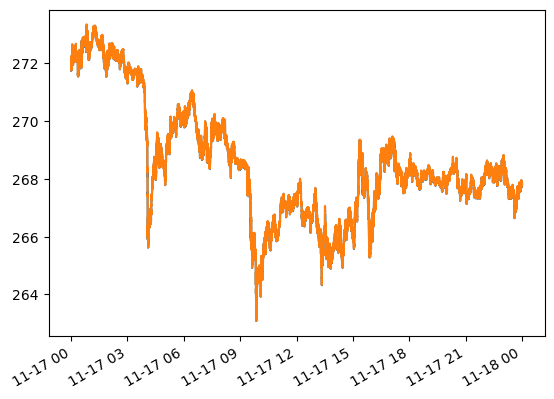

In [26]:
# Use Numba list for njit.
from numba.typed import List
from numba import float64

hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)

local_timestamp = List.empty_list(float64, allocated=10000)
best_bid = List.empty_list(float64, allocated=10000)
best_ask = List.empty_list(float64, allocated=10000)

plot_bbo(hbt, local_timestamp, best_bid, best_ask)

local_timestamp = pd.to_datetime(local_timestamp, unit='us', utc=True)
best_bid = pd.Series(best_bid, index=local_timestamp)
best_ask = pd.Series(best_ask, index=local_timestamp)

best_bid.plot()
best_ask.plot()

### Printing stats

In [27]:
@njit
def submit_order_stats(hbt, recorder):
    buy_order_id = 1
    sell_order_id = 2
    half_spread = 100 * hbt.tick_size
    
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        hbt.clear_inactive_orders()
        
        mid = (hbt.best_bid + hbt.best_ask) / 2.0
        
        if buy_order_id not in hbt.orders:
            order_price = round((mid - half_spread) / hbt.tick_size) * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(buy_order_id, order_price, order_qty, time_in_force)
            
        if sell_order_id not in hbt.orders:
            order_price = round((mid + half_spread) / hbt.tick_size) * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_sell_order(sell_order_id, order_price, order_qty, time_in_force)
            
        recorder.record(hbt)
    return True

=========== Summary ===========
Sharpe ratio: 4.6
Sortino ratio: 6.3
Risk return ratio: 130.2
Annualised return: 162.70 %
Max. draw down: 1.25 %
The number of trades per day: 6
Avg. daily trading volume: 6
Avg. daily trading amount: 1861
Max leverage: 0.94
Median leverage: 0.93


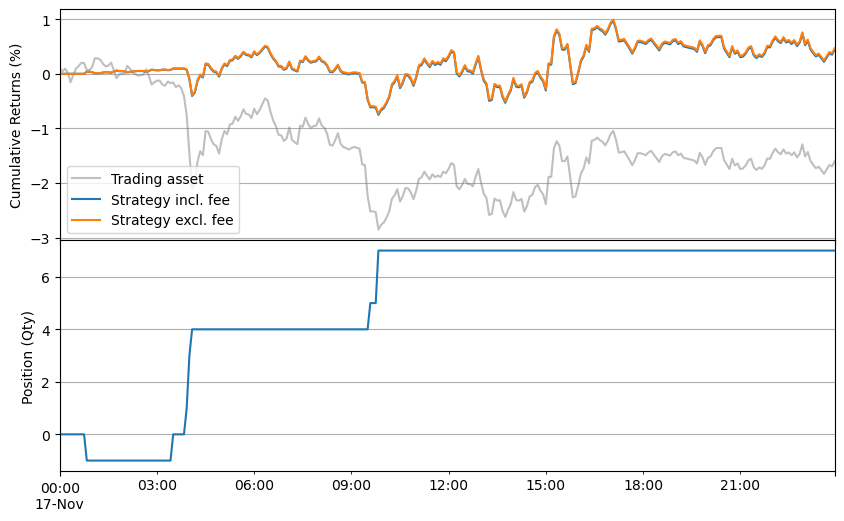

In [28]:
from hftbacktest import Stat

hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)

stat = Stat(hbt)
submit_order_stats(hbt, stat.recorder)
stat.summary(capital=2000)